In [72]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split


In [73]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [75]:
df.duplicated().sum()

0

In [76]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [77]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [78]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [80]:
df=df.astype(float)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


In [81]:
x=df.drop(columns=['Exited'])
y=df['Exited'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [83]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [84]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
# model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train_scaled,y_train,epochs=10,validation_split=.2)

Epoch 1/10


200/200 [==============================] - 1s 1ms/step - loss: 0.5150 - accuracy: 0.7950 - val_loss: 0.4911 - val_accuracy: 0.7969
Epoch 2/10
200/200 [==============================] - 0s 880us/step - loss: 0.4744 - accuracy: 0.7958 - val_loss: 0.4672 - val_accuracy: 0.7969
Epoch 3/10
200/200 [==============================] - 0s 862us/step - loss: 0.4580 - accuracy: 0.7958 - val_loss: 0.4557 - val_accuracy: 0.7969
Epoch 4/10
200/200 [==============================] - 0s 861us/step - loss: 0.4486 - accuracy: 0.7959 - val_loss: 0.4484 - val_accuracy: 0.7962
Epoch 5/10
200/200 [==============================] - 0s 861us/step - loss: 0.4419 - accuracy: 0.7955 - val_loss: 0.4434 - val_accuracy: 0.7956
Epoch 6/10
200/200 [==============================] - 0s 861us/step - loss: 0.4372 - accuracy: 0.7961 - val_loss: 0.4398 - val_accuracy: 0.7956
Epoch 7/10
200/200 [==============================] - 0s 858us/step - loss: 0.4337 - accuracy: 0.7980 - val_loss: 0.4374 - val_accuracy: 0.7962
Epoch

In [87]:
model.layers[0].get_weights()

[array([[-0.05694593, -0.11322034,  0.33270732],
        [ 1.3129758 , -1.3256835 , -1.0595584 ],
        [-0.22086905,  0.06365936,  0.06428419],
        [-0.297511  , -0.38995743, -0.32585996],
        [ 0.03883682, -0.12010701,  0.41129932],
        [-0.04843654, -0.02473852,  0.04561794],
        [-0.07943737,  0.7333815 ,  0.5062699 ],
        [-0.14827797, -0.25051484,  0.07139742],
        [ 0.7573002 , -0.27491993, -0.41497353],
        [ 0.06338268, -0.08385651,  0.12364472],
        [-0.4142776 ,  0.2068016 ,  0.58753747]], dtype=float32),
 array([-0.13093211,  0.3270309 ,  0.2953994 ], dtype=float32)]

In [88]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 634us/step


In [89]:
y_pred=np.where(y_log>0.5,1,0)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8065

In [91]:
history.history

{'loss': [0.5149670243263245,
  0.47440600395202637,
  0.45801055431365967,
  0.4485551118850708,
  0.44193944334983826,
  0.4371659457683563,
  0.4336905777454376,
  0.4312177300453186,
  0.42941102385520935,
  0.42815345525741577],
 'accuracy': [0.7950000166893005,
  0.7957812547683716,
  0.7957812547683716,
  0.7959374785423279,
  0.7954687476158142,
  0.796093761920929,
  0.7979687452316284,
  0.7998437285423279,
  0.8003125190734863,
  0.8004687428474426],
 'val_loss': [0.4910881817340851,
  0.46717578172683716,
  0.4557357132434845,
  0.44836485385894775,
  0.44336214661598206,
  0.43984803557395935,
  0.43740636110305786,
  0.435746967792511,
  0.43465760350227356,
  0.433939129114151],
 'val_accuracy': [0.796875,
  0.796875,
  0.796875,
  0.7962499856948853,
  0.7956249713897705,
  0.7956249713897705,
  0.7962499856948853,
  0.7993749976158142,
  0.8025000095367432,
  0.8043749928474426]}

In [92]:
import matplotlib.pyplot as plt

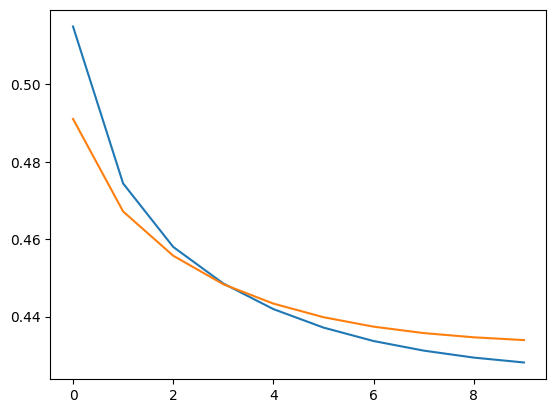

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

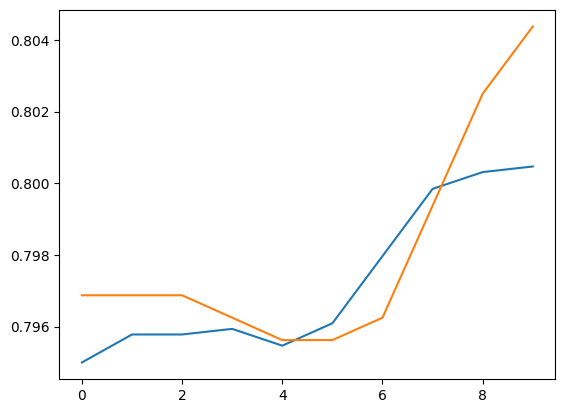

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])